# Volatility and Risk

We've seen that the volatility is measured by the average squared deviation from the mean, which is the standard deviation.

Let's read the sample returns that we've been working with.

In [1]:
import pandas as pd
prices = pd.read_csv('C:/Users/Lenovo/OneDrive - ftu.edu.vn/Desktop/Github/Quantitative-methods-in-PM-/Fin2 - PM using Python/Lecture 1_ Returns and Risk/sample_prices.csv')
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


Notice that the first set of returns are NaN, which is Pandas way of saying that it's an NA. We can drop that row using the `.dropna()` method.

In [2]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


Let's compute the standard deviation from first principals:

In [3]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()

import numpy as np

volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

Let's see if we get the same answer when we use the built-in `.std()` method.

In [5]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Why don't they match? Because, by default, the `.std()` method computes the _sample standard deviation_ which means that it uses the denominator of $n-1$. On the other hand, we computed the _population_ standard deviation, which uses a numerator of $n$. Since the observed returns are thought of as observed samples from a distribution, it is probably more accurate to use the denominator of $n-1$, so let's redo our calculation to see if we get the same number.

To get the number of observations, we can use the `.shape` attribute of a DataFrame that returns a tuple of the number of rows and columns.

In [8]:
returns.shape

(12, 2)

In [13]:
returns.shape[0]

12

Just as we can with a list, we can access the elements of a tuple using an index, starting at 0. Therefore, to get the number of rows in the DataFrame, we extract the 0th element of the tuple.

In [14]:
number_of_obs = returns.shape[0] #a way to count the number of observations 
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [15]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

# Annualizing Volatility

We annualize volatility by scaling (multiplying) it by the square root of the number of periods per observation

Therefore, to annualize the volatility of a monthly series, we muiltiply it by the square root of 12. Instead of using the `np.sqrt()` we can raise it to the power of $0.5$

In [17]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [24]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

# Risk Adjusted Returns

Let's get beyond the sample data series and start working with some real data. Read in the monthly returns of a set of 10 portfolios formed on market caps, or market equities of the companies. Of the 10 portfolios, we only want to look at the largest cap and the smallest cap companies:

In [46]:
me_m = pd.read_csv('C:/Users/Lenovo/OneDrive - ftu.edu.vn/Desktop/Github/Quantitative-methods-in-PM-/Fin2 - PM using Python/Lecture 1_ Returns and Risk/Portfolios_Formed_on_ME_monthly_EW.csv',
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24148\55487503.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv('C:/Users/Lenovo/OneDrive - ftu.edu.vn/Desktop/Github/Quantitative-methods-in-PM-/Fin2 - PM using Python/Lecture 1_ Returns and Risk/Portfolios_Formed_on_ME_monthly_EW.csv',


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [47]:
me_m1= pd.read_csv('C:/Users/Lenovo/OneDrive - ftu.edu.vn/Desktop/Github/Quantitative-methods-in-PM-/Fin2 - PM using Python/Lecture 1_ Returns and Risk/edhec-hedgefundindices.csv',
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m1.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24148\3416542277.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  me_m1= pd.read_csv('C:/Users/Lenovo/OneDrive - ftu.edu.vn/Desktop/Github/Quantitative-methods-in-PM-/Fin2 - PM using Python/Lecture 1_ Returns and Risk/edhec-hedgefundindices.csv',


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02-28,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03-31,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04-30,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05-31,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


In [48]:
cols = ['Lo 10', 'Hi 10']
returns = me_m[cols]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


Note that the data is already given in percentages (i.e 4.5 instead of 0.045) and we typically want to use the actual numbers (i.e. 0.045 instead of 4.5) so we should divide the raw data from the file by 100.

In [49]:
returns = returns/100

In [50]:
me_m1=me_m1/100

<Axes: >

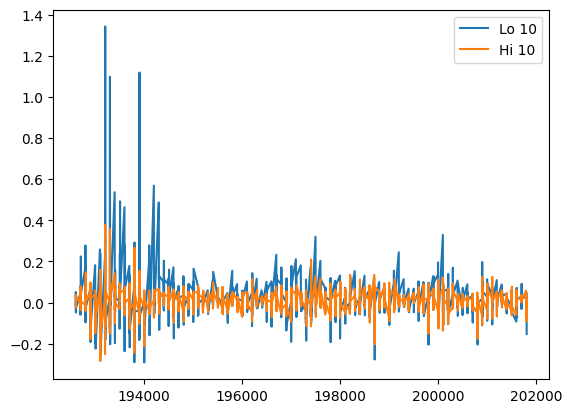

In [51]:
returns.plot()

<Axes: xlabel='date'>

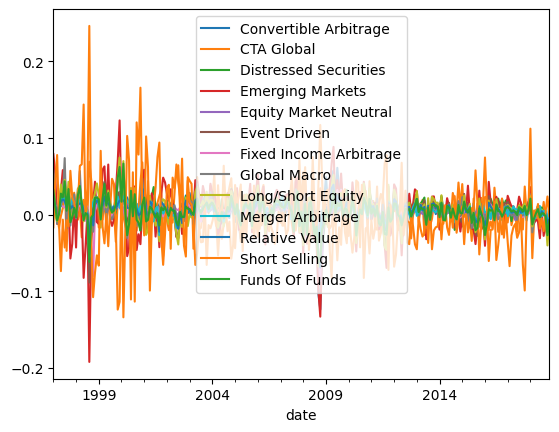

In [52]:
me_m1.plot()

In [31]:
returns.columns = ['SmallCap', 'LargeCap']

<Axes: >

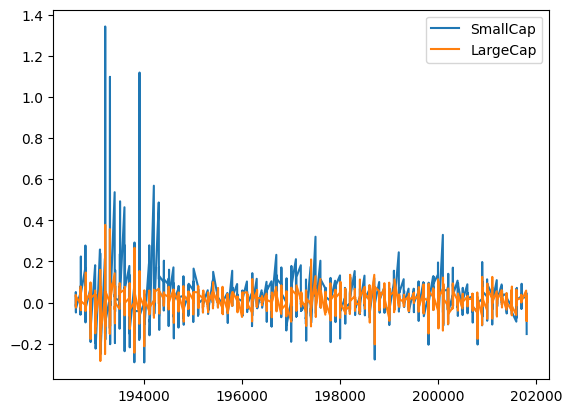

In [32]:
returns.plot()

In [53]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Lo 10    0.368193
Hi 10    0.186716
dtype: float64

In [54]:
annualized_vol1 = me_m1.std()*np.sqrt(12)
annualized_vol1

Convertible Arbitrage     0.057391
CTA Global                0.080833
Distressed Securities     0.059034
Emerging Markets          0.112713
Equity Market Neutral     0.028164
Event Driven              0.058001
Fixed Income Arbitrage    0.039972
Global Macro              0.050999
Long/Short Equity         0.069056
Merger Arbitrage          0.033320
Relative Value            0.039781
Short Selling             0.165396
Funds Of Funds            0.053921
dtype: float64

We can now compute the annualized returns as follows:

In [55]:
n_months = returns.shape[0] #way to count obs 
return_per_month = (returns+1).prod()**(1/n_months) - 1 #monthly compounded return
return_per_month

Lo 10    0.012986
Hi 10    0.007423
dtype: float64

In [56]:
n_months1 = me_m1.shape[0] #way to count obs 
return_per_month1 = (me_m1+1).prod()**(1/n_months) - 1 #monthly compounded return
return_per_month1

Convertible Arbitrage     0.001269
CTA Global                0.000900
Distressed Securities     0.001607
Emerging Markets          0.001351
Equity Market Neutral     0.001056
Event Driven              0.001466
Fixed Income Arbitrage    0.001016
Global Macro              0.001252
Long/Short Equity         0.001450
Merger Arbitrage          0.001256
Relative Value            0.001354
Short Selling            -0.000668
Funds Of Funds            0.000980
dtype: float64

In [57]:
annualized_return1 = (return_per_month1 + 1)**12-1

In [59]:
annualized_return1 = (me_m1+1).prod()**(12/n_months) - 1
annualized_return1

Convertible Arbitrage     0.015338
CTA Global                0.010854
Distressed Securities     0.019456
Emerging Markets          0.016330
Equity Market Neutral     0.012747
Event Driven              0.017739
Fixed Income Arbitrage    0.012265
Global Macro              0.015133
Long/Short Equity         0.017536
Merger Arbitrage          0.015171
Relative Value            0.016366
Short Selling            -0.007989
Funds Of Funds            0.011821
dtype: float64

In [41]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [42]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64